In [1]:
import pandas as pd
data = pd.read_csv("customer_sales_data.csv")
data

,Customer_ID,Name,Age,Gender,Location,Purchase_Amount,Purchase_Date,Payment_Method,Product_Category,Rating
0,CUST1000,Zachary Francis,33,Female,Ashleyton,41.23,2025-01-17,Cash,Books,1.5
1,CUST1001,Eric Lopez,19,Male,East Richardland,192.76,2024-03-19,Cash,Home Decor,4.4
2,CUST1002,Mary Fernandez,51,Male,Port Kyle,344.12,2024-12-13,PayPal,Clothing,2.4
3,CUST1003,Dr. Keith Rasmussen DDS,49,Other,New Jeffrey,681.17,2025-01-15,PayPal,Home Decor,2.9
4,CUST1004,Savannah Young,48,Female,Port Williamfurt,640.15,2024-06-13,PayPal,Groceries,2.6
...,...,...,...,...,...,...,...,...,...,...
95,CUST1095,Thomas Powell,60,Female,Christopherside,189.97,2024-02-17,PayPal,Electronics,1.9
96,CUST1096,Elizabeth Lee,62,Male,West Danny,727.02,2024-03-11,UPI,Electronics,4.1
97,CUST1097,Ashlee Vasquez,26,Male,Johnnyland,191.60,2024-07-26,Credit Card,Clothing,2.5
98,CUST1098,Christopher Smith,56,Other,North Michael,154.82,2024-12-09,Credit Card,Groceries,4.7


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       100 non-null    object 
 1   Name              100 non-null    object 
 2   Age               100 non-null    int64  
 3   Gender            100 non-null    object 
 4   Location          100 non-null    object 
 5   Purchase_Amount   100 non-null    float64
 6   Purchase_Date     100 non-null    object 
 7   Payment_Method    100 non-null    object 
 8   Product_Category  100 non-null    object 
 9   Rating            100 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 7.9+ KB


In [3]:
data["Purchase_Date"] = pd.to_datetime(data["Purchase_Date"])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       100 non-null    object        
 1   Name              100 non-null    object        
 2   Age               100 non-null    int64         
 3   Gender            100 non-null    object        
 4   Location          100 non-null    object        
 5   Purchase_Amount   100 non-null    float64       
 6   Purchase_Date     100 non-null    datetime64[ns]
 7   Payment_Method    100 non-null    object        
 8   Product_Category  100 non-null    object        
 9   Rating            100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.9+ KB


In [6]:
data.isnull().count()

Customer_ID         100
Name                100
Age                 100
Gender              100
Location            100
Purchase_Amount     100
Purchase_Date       100
Payment_Method      100
Product_Category    100
Rating              100
dtype: int64

In [12]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
surv = df['Survived']
surv

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
numerical_cols = df.select_dtypes(include=['number'])
y = numerical_cols['Survived']
x= numerical_cols.drop(columns='Survived',axis = 1)
x.corr().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.04,0.04,-0.06,-0.00,0.01
Pclass,-0.04,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,-0.55,0.10,0.16,0.22,1.00


<Axes: >

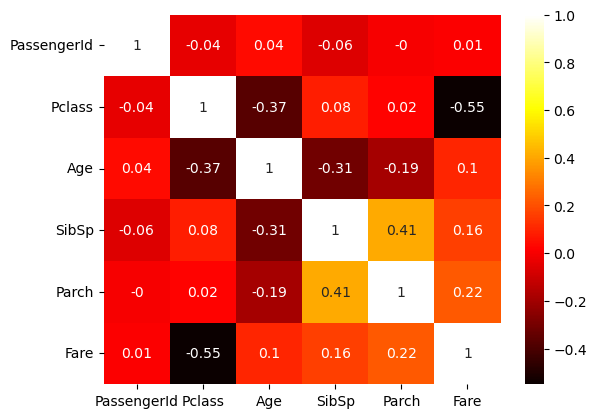

In [34]:
import seaborn as sns
sns.heatmap(x.corr().round(2),annot=True , cmap="hot")

In [35]:
df['Pclass'].corr(df['Fare'])

-0.5494996199439078

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {'Difficulty':['Easy','Medium','Hard','Medium','Easy'],'Scores':[50,60,70,80,90]}
df = pd.DataFrame(data)
encoder = LabelEncoder()
df['Difficulty_encoded'] = encoder.fit_transform(df['Difficulty'])
print(df)
cor = df['Difficulty_encoded'].corr(df['Scores'])
print(cor)

  Difficulty  Scores  Difficulty_encoded
0       Easy      50                   0
1     Medium      60                   2
2       Hard      70                   1
3     Medium      80                   2
4       Easy      90                   0
0.0


In [48]:
data = {'Color':['Red','Blue','Green','Blue','Red'],'Scores':[50,60,70,80,90]}
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df,columns=['Color'])
print(df_encoded) 
cor = df_encoded['Color_Red'].corr(df_encoded['Scores'])
print(cor)

   Scores  Color_Blue  Color_Green  Color_Red
0      50       False        False       True
1      60        True        False      False
2      70       False         True      False
3      80        True        False      False
4      90       False        False       True
-1.2819751242557094e-17
